## Feature engineering and `nn.optim` package to solve the famous `XOR` problem

Start with your usual imports

In [ ]:
import torch as pt
import matplotlib.pyplot as plt
%matplotlib inline
pt.manual_seed(42);

The following generates and plots a randomly generated dataset of 100 spam and 100 non-spam data points where the points have the same property as with the `XOR` problem: a simple linear function can't accurately classify the points. However this problem can be solved using a feature engineering technique that you are going to implement shortly.

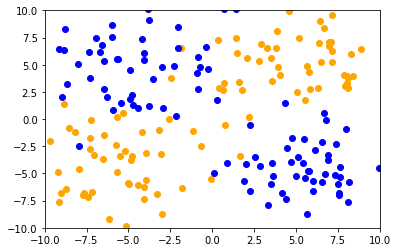

In [ ]:
NUM = 100

#X spam data points 

#lower left
Xs1 = pt.normal(0, 3, [NUM // 2, 2]) - 5
#upper right
Xs2 = pt.normal(0, 3, [NUM // 2, 2]) + 5

#100 spam data points
Xs = pt.cat([Xs1, Xs2])


#X not spam data points
#upper left
Xns1 = pt.normal(0, 3, [NUM // 2, 2]) + 5
Xns1[:, 1] = Xns1[:, 1] - 10

#lower right
Xns2 = pt.normal(0, 3, [NUM // 2, 2]) - 5
Xns2[:, 1] = Xns2[:, 1] + 10

#100 not spam data points
Xns = pt.cat([Xns1, Xns2])

#200 data points, 100 spam, 100 not spam
X = pt.cat([Xs, Xns])

plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');

plt.scatter(X[NUM:, 0], X[NUM:, 1], color = 'blue');

plt.xlim([-10, 10])
plt.ylim([-10, 10]);

## Create a tensor named `y` to store your training targets (labels), using `1` for one class and `-1` for another. 

The resulting tensor should have the shape of `torch.Size([200])`

In [ ]:
y = pt.cat([pt.ones(NUM), -1 * pt.ones(NUM)])
y.shape

torch.Size([200])

## Modify the `X` tensor to add a cross-product feature

The 3rd column of the `X` tensor should have the value of the product of the horizontal and vertical values of the data point.

Once you are done, the updated `X` tensor should have the shape of `(torch.Size([200, 3])`

In [ ]:
Xp = (X[:, 0] * X[:, 1]).unsqueeze(dim = 1)
X = pt.cat([X, Xp], dim = 1)

X.shape

torch.Size([200, 3])

## Implement the `forward`, `loss`, and `metric` methods

In [ ]:
def forward(X):
  return pt.sum(w * X, axis = 1)

def loss(y_pred, y):
  return ((y - y_pred) ** 2).mean()

def metric(y_pred, y):
  return pt.sum(((y > 0) & (y_pred > 0)) | ((y <= 0) & (y_pred <= 0))) * (1. / len(y))

## Create a tensor with model parameters (weights) and an instance of the `AdamW` optimizer for the model

Don't forget to use `requires_grad` for the model parameters.

In [ ]:
w = pt.randn(3, requires_grad = True)

optimizer = pt.optim.AdamW([w])

## Run 10 steps of gradient descent using your optimizer

* **hint:** the `optimizer.step` function performs the update to the weights using the gradients you have computed using `backward`
* **hint:** the `optimizer.zero_grad` function zeroes out the gradients



In [ ]:
for i in range(10):
  y_pred = forward(X)
  mse = loss(y_pred, y)
  accuracy = metric(y_pred, y)
  mse.backward()
  optimizer.step()
  optimizer.zero_grad()

print("Loss: ", mse.data.item(), " Accuracy: ", accuracy.data.item(), " Grads: ", w.grad)

Loss:  663.6553955078125  Accuracy:  0.9149999618530273  Grads:  tensor([0., 0., 0.])


## You should be able to achieve the accuracy of about 90%. 

Since the points are overlapping in the dataset, you are not going to be able to classify them perfectly with this simplictic model.

Copyright 2021 CounterFactual.AI LLC. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.